In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 200, 'lr': 0.01, 'momentum': 0.3, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 8, 'conv1_kernel_size': 5, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'crop': 200, 'size': 128, 'mean': 0.25, 'std': 0.33}


In [4]:
#!rm {path}

In [5]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 850 sample images;  680  to train 170 to test
Loading file _Regard.pt


## testing the model

In [6]:
Accuracy = ml.test()


Test set: Average loss: 0.6776, Accuracy: 163/170 (95%)



target:blink
pred  :right


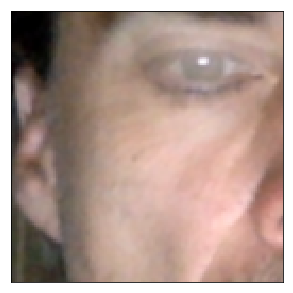

target: left
pred  :center


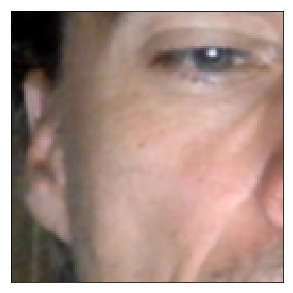

target:right
pred  :center


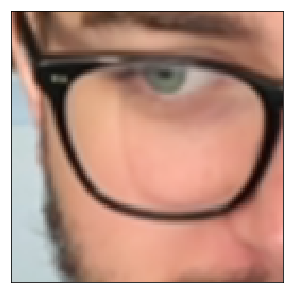

target:blink
pred  : left


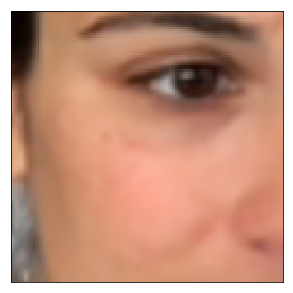

target:center
pred  :right


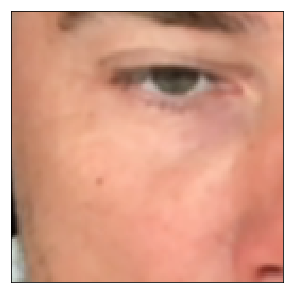

RuntimeError: Interrupted system call at /Users/laurentperrinet/nextcloud/libs/pytorch/torch/lib/libshm/core.cpp:125

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


for data, labels in ml.d.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 

